# MovieLens Probabilities and Likelihoods from Datasets  

Using the MovieLens dataset to plot boxplots, a heatmap and develop a logistic regression model. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
%cd ~/Documents/DBS/Advanced Data Analytics/CA3

C:\Users\barre\Documents\DBS\Advanced Data Analytics\CA3


## Load the Data  

From the website http://grouplens.org/datasets/movielens/ I downloaded the MovieLens data files. I loaded the following three files into python to create a dataset  to analyse.  

- u.user - containing the users information such as age, gender, occupation and zip code
- u.data - contains the ratings, user ids and movie ids
- u.item - contains the movie information including title, release date and genre  

After loading each file I used .info() to see the columns and how many records in each allowing me to see any missing values.

In [3]:
# Create column names for user data and import user data into a data frame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep = '|', names = user_cols, encoding = 'latin-1')
users.head()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [4]:
# Create column names for ratings data and import into a data frame
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']              
ratings = pd.read_csv('ml-100k/u.data', sep = '\t', names = rating_cols, encoding = 'latin-1')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
# Create column names for movie data and import the data into a data frame
movie_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',             
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western']
movies = pd.read_csv('ml-100k/u.item', sep = '|', names = movie_cols, encoding = 'latin-1')

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id              1682 non-null int64
movie_title           1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
IMDb_URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children              1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

The info function shows that one column, video release date, has no values at all. It is pointless including this so I will drop it. The column IMdB_URL is missing 3 values and release_date is missing 1. Looking at the questions we need to answer for the CA these columns will not be required so I am also going to drop them. 

In [6]:
# Drop columns with missing values - none of which are required in the analysis
movies.drop('video_release_date', axis=1, inplace=True)
movies.drop('release_date', axis=1, inplace=True)
movies.drop('IMDb_URL', axis=1, inplace=True)

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
movie_id       1682 non-null int64
movie_title    1682 non-null object
unknown        1682 non-null int64
Action         1682 non-null int64
Adventure      1682 non-null int64
Animation      1682 non-null int64
Children       1682 non-null int64
Comedy         1682 non-null int64
Crime          1682 non-null int64
Documentary    1682 non-null int64
Drama          1682 non-null int64
Fantasy        1682 non-null int64
Film-Noir      1682 non-null int64
Horror         1682 non-null int64
Musical        1682 non-null int64
Mystery        1682 non-null int64
Romance        1682 non-null int64
Sci-Fi         1682 non-null int64
Thriller       1682 non-null int64
War            1682 non-null int64
Western        1682 non-null int64
dtypes: int64(20), object(1)
memory usage: 276.0+ KB


The three columns have been dropped so there are no longer any missing values and I can go ahead with merging the files to create my dataset. Ratings is my largest file so I started with this and merged it with movies using movie_id as the key.

In [7]:
result = pd.merge(ratings, movies, on = 'movie_id')

I then merged this result with the users information using user_id as the key and this gives me my merged dataset called movielens.

In [8]:
movielens = pd.merge(result, users, on = 'user_id')

In [26]:
movielens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
user_id        100000 non-null int64
movie_id       100000 non-null int64
rating         100000 non-null int64
timestamp      100000 non-null int64
movie_title    100000 non-null object
unknown        100000 non-null int64
Action         100000 non-null int64
Adventure      100000 non-null int64
Animation      100000 non-null int64
Children       100000 non-null int64
Comedy         100000 non-null int64
Crime          100000 non-null int64
Documentary    100000 non-null int64
Drama          100000 non-null int64
Fantasy        100000 non-null int64
Film-Noir      100000 non-null int64
Horror         100000 non-null int64
Musical        100000 non-null int64
Mystery        100000 non-null int64
Romance        100000 non-null int64
Sci-Fi         100000 non-null int64
Thriller       100000 non-null int64
War            100000 non-null int64
Western        100000 non-null int64
a

By printing out the first 5 rows I can see what the dataset looks like.

In [27]:
movielens.head()

,user_id,movie_id,rating,timestamp,movie_title,unknown,Action,Adventure,Animation,Children,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),0,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),0,1,1,0,0,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",0,0,0,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",0,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105


## Heatmap  

I need to plot a heatmap of occupation against genre with the squares of the heatmap corresponding to the average rating for that genre by that occupation.  

This requires the data to be in a different format to what I have now. Currently the genres are each separate columns with a 1 or 0 for yes or no. I still want the genres in separate columns when I come to plot the heatmap but I need to get the average ratings for each for each occupation.   

I decided to melt all of the genre columns into one 'Genre' column with the values of each (1 or 0) in a value column. This created a large number of extra rows which are unnecessary - they are where the particular genre has a 0 for that record. From the resulting dataframe I took only the rows with a 1 in the values column i.e. just the rows which were actually the genre.  

I then pivoted this so that I have a table with occupation as the rows, genre as the columns and used the aggfunc function to set the values to be the mean of the ratings.

In [9]:
# Melt the genre columns into one column names genre
movielens_melt_occ = pd.melt(movielens[['user_id', 'rating', 'occupation','unknown', 'Action', 'Adventure', 'Animation',             
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western'] ], id_vars=['user_id', 'rating','occupation'], 
                         var_name='Genre')

# Filter the rows with a 1 in the value
movielens_melt_occ = movielens_melt_occ[movielens_melt_occ['value']== 1][['user_id', 'rating','occupation','Genre']]

#Pivot into occupation against genre
movielens_occ_genre = pd.pivot_table(movielens_melt_occ, columns = ['Genre'], index = ['occupation'], 
                                     values = ['rating'], aggfunc = np.mean)
movielens_occ_genre

rating                                                    \
Genre            Action Adventure Animation  Children    Comedy     Crime   
occupation                                                                  
administrator  3.538751  3.521569  3.738916  3.448052  3.494780  3.693805   
artist         3.539773  3.581994  3.421488  3.391089  3.521880  3.676617   
doctor         3.618182  3.561404  3.363636  3.500000  3.559524  3.804878   
educator       3.581549  3.619681  3.593156  3.397976  3.564993  3.752113   
engineer       3.488801  3.538876  3.614325  3.386328  3.433552  3.666121   
entertainment  3.406814  3.365462  3.467742  3.086538  3.296167  3.710145   
executive      3.532178  3.529817  3.560440  3.202586  3.098843  3.505226   
healthcare     3.053726  3.012384  2.865169  2.718310  2.713296  3.045000   
homemaker      3.456522  3.439024  3.111111  2.920000  2.967742  3.360000   
lawyer         3.692580  3.859155  3.771429  3.373494  3.493478  3.747664   
librarian      3.401822  3.404851  3.553459  3.389655  3.456853  3.654054   
marketing      3.484277  3.434959  3.278481  3.092025  3.360748  3.515528   
none           3.724252  3.706250  3.976744  3.725275  3.678431  3.594595   
other          3.475674  3.554158  3.672209  3.488082  3.406951  3.595411   
programmer     3.565891  3.595968  3.660256  3.344768  3.428040  3.669670   
retired        3.410072  3.387500  3.628571  3.281818  3.458984  3.613139   
salesman       3.653153  3.717172  3.666667  3.500000  3.187898  3.860759   
scientist      3.422261  3.442105  3.639344  3.481481  3.446729  3.813559   
student        3.466552  3.484515  3.563457  3.356453  3.375683  3.657407   
technician     3.459685  3.458781  3.606061  3.271493  3.381629  3.509091   
writer         3.285604  3.302671  3.500000  3.324251  3.268742  3.502008   

                                                                             \
Genre         Documentary     Drama   Fantasy Film-Noir    Horror   Musical   
occupation                                                                    
administrator    3.875000  3.796063  3.468085  3.972789  3.393862  3.596045   
artist           4.147059  3.789969  3.291667  4.234375  3.460784  3.414013   
doctor           3.461538  3.785714  3.000000  4.111111  3.500000  3.592593   
educator         3.775701  3.811259  3.508929  4.064356  3.171021  3.594595   
engineer         3.666667  3.701554  3.200000  3.924138  3.282609  3.517007   
entertainment    3.869565  3.605721  2.960000  3.914894  3.229167  3.367647   
executive        2.192308  3.477612  2.840000  3.603448  3.200000  3.625954   
healthcare       2.600000  2.982267  2.789474  3.100000  2.550000  3.277778   
homemaker        3.500000  3.538462  1.666667  3.250000  3.222222  2.800000   
lawyer           3.900000  3.802947  3.142857  4.500000  3.866667  3.861111   
librarian        3.812500  3.701603  3.218182  3.968750  3.168142  3.348739   
marketing        3.583333  3.608010  3.400000  4.100000  3.418605  3.298246   
none             4.000000  3.932836  3.583333  3.500000  3.857143  3.860465   
other            3.784615  3.719294  3.388889  3.842466  3.244860  3.627208   
programmer       3.725490  3.755714  3.367521  3.886525  3.290488  3.524675   
retired          3.437500  3.514443  3.363636  4.023256  3.318182  3.526882   
salesman         4.000000  3.984227  3.333333  3.785714  3.326531  3.592593   
scientist        3.882353  3.815451  3.150000  4.025641  3.385714  3.549451   
student          3.829060  3.702842  3.048295  3.832714  3.389552  3.501855   
technician       3.958333  3.694981  3.157895  4.021739  3.420732  3.457143   
writer           3.782609  3.511322  3.197183  3.968000  3.107930  3.474265   

                                                                           \
Genre           Mystery   Romance    Sci-Fi  Thriller       War   Western   
occupation                                                                  
administrator  3.763636  3.741391  3.650

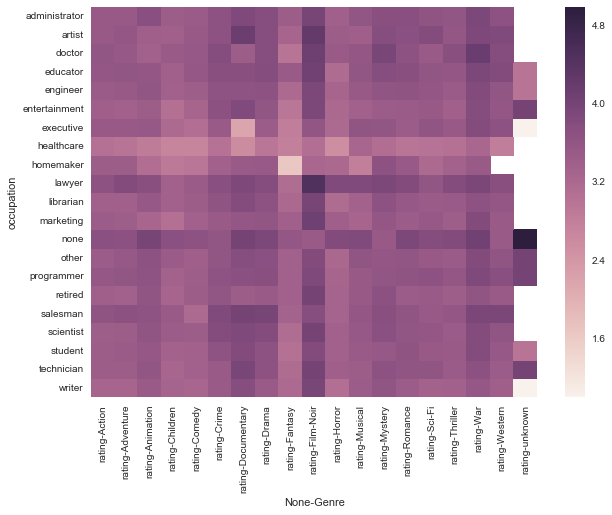

In [29]:
#Plot a Heatmap of occupation and genre
fig = plt.figure(figsize=(10,7))
hm = sns.heatmap(movielens_occ_genre)

Looking at the heatmap you can quickly see that, on average, healthcare workers give a lower rating to all genres - the highest average rating is 3.3 for both war movies and musicals. Also just looking at the colour it is clear that film noir has a higher average rating from all occupations compared to the other genres while fantasy movies look to have the lowest. I plotted the heatmap again below including the scores.   

The unknown column is mostly NaN values so this isn't really adding any information to the visual. The only other cell with a NaN is homemaker and western. This is kind of interesting as it means not a single homemaker has rated a western movie.

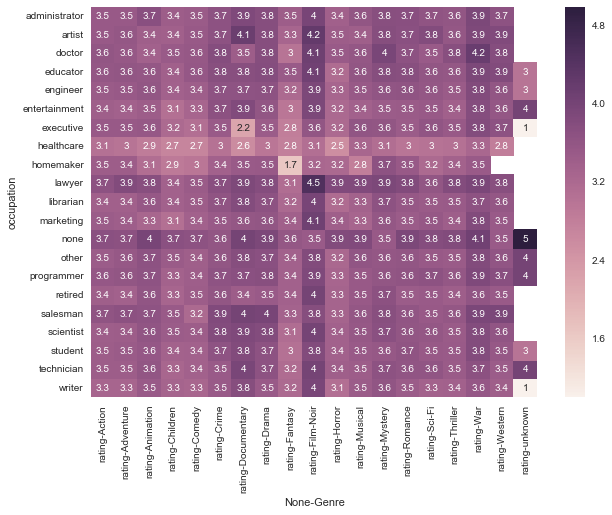

In [30]:
#Heatmap of occupation and genre including the ratings
fig = plt.figure(figsize=(10,7))
hm = sns.heatmap(movielens_occ_genre, annot = True)

## Boxplots  

From the heatmap above I thought it would be interesting to compare artists and executives on genres documentary and film noir. I took as subsets of the dataframe the records where occupation is artist or executive and genre is documentary and another the same except genre is film-noir. 

[(0.5, 5.5)]

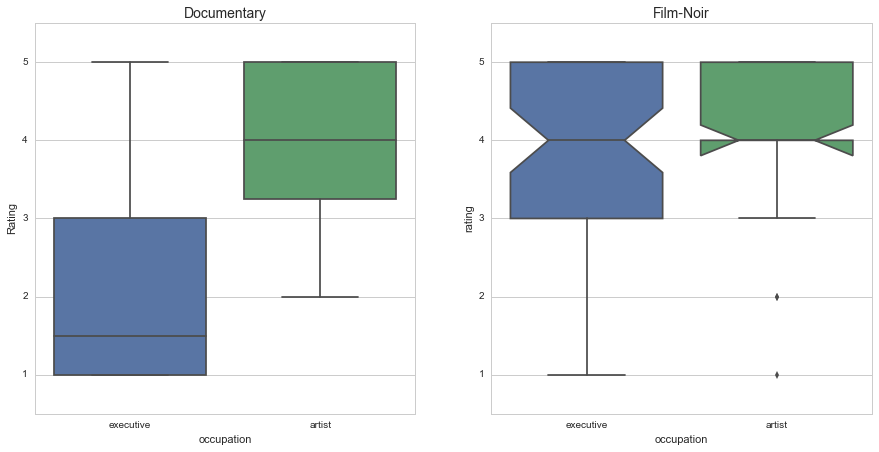

In [10]:
# Create a subset of the dataframe containing just artists, executives and documentary = 1
documentary = movielens[((movielens['occupation'] == 'artist')|(movielens['occupation'] == 'executive')) & 
                               (movielens['Documentary']== 1)]

# Create a subset of the dataframe containing just artists, executives and film-noir = 1
film_noir = movielens[((movielens['occupation'] == 'artist')|(movielens['occupation'] == 'executive')) & 
                               (movielens['Film-Noir']== 1)]

#Clear figure and create new figure 
plt.clf()
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,7))

# Plot box plots
doc_plot = sns.boxplot(x = 'occupation', y = 'rating', data = documentary, ax=axis1)
doc_plot.set_title('Documentary', fontsize = 14)
doc_plot.set_ylabel('Rating')
doc_plot.set(ylim=(0.5,5.5))

film_plot = sns.boxplot(x = 'occupation', y = 'rating', data = film_noir, ax = axis2, notch=True)
film_plot.set_title('Film-Noir', fontsize = 14)
film_plot.set(ylim=(0.5,5.5))

It is clear from the Documentary box plot that artists are more likely than executives to give a higher rating to documentaries. There are no outliers in the data - all ratings are within 1.5 times the IQR. Both box plots have only one whisker. This means that the data in the quartile without the whisker is all together so no line can be drawn e.g. for executive the first 25% of ratings are all 1s. As the data is ratings on a scale of 1 to 5 this makes sense that a genre could have one quarter of the ratings as 1. Again for artist the rating cannot go above 5 so if the highest 25% of ratings are all 5 then no whisker appears. The median rating by executives is 1.5 and by artists 4. A movie cannot be rated 1.5 so this data set is obviously of even length leading to the average of the two middle values giving the median. The average ratings in the heatmap for these intersections were 2.2 for executives and and 4.1 for artists. For artists the mean and median are close together while they are more spread out for executives. 

The boxplot for Film-Noir has outliers for the artist plot. The majority of the ratings fall within the range 3 to 5 but there are two outliers on the plot at 1 and 2. From the boxplot again it looks like artists are more likely than executives to rate film-noir movies highly. Q4 for both box plots entirely consists of 5s hence there are no whiskers at the top of the plots. The median for the artist boxplot was not clear until I plotted it with notches. The notch shows the median is actually 4. Q2 doesn't really show on the graph as it is all 4s. The median of both boxplots are the same while the average ratings are different - 4.2 by artists and 3.6 from executives.

## Logistic Regression  

In order to carry out the logistic regression I need my data in a different format so I need to do some preparation steps. I need gender, genres, user id, and rating.

In [11]:
# Select the columns I need for the regression and melt the genre columns into one column named genre
movielens_melt_id = pd.melt(movielens[['user_id', 'rating', 'gender','unknown', 'Action', 'Adventure', 'Animation',             
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western'] ], id_vars=['user_id', 'rating', 'gender'], 
                         var_name='genre')

# Discard the rows with a 0 in the value column
movielens_melt_id = movielens_melt_id[movielens_melt_id['value']== 1][['user_id', 'rating','gender','genre']]

#Pivot into user_id against genre
movielens_id_genre = pd.pivot_table(movielens_melt_id, columns = ['genre'], index = ['user_id', 'gender'], 
                                     values = ['rating'], aggfunc = np.mean)
movielens_id_genre.head()

rating                                                    \
genre             Action Adventure Animation  Children    Comedy     Crime   
user_id gender                                                               
1       M       3.333333  2.928571  3.333333  2.200000  3.472527  3.440000   
2       F       3.800000  4.333333  4.000000  3.000000  3.812500  3.777778   
3       M       2.785714  3.500000       NaN       NaN  2.583333  3.000000   
4       M       3.875000  3.500000       NaN       NaN  5.000000  4.750000   
5       F       3.142857  3.242424  3.785714  2.448276  3.000000  3.888889   

                                                                            \
genre          Documentary     Drama Fantasy Film-Noir    Horror   Musical   
user_id gender                                                               
1       M              4.8  3.925234     3.5       5.0  3.461538  2.923077   
2       F              NaN  3.828571     3.0       4.5  3.000000  3.000000   
3       M              5.0  2.909091     NaN       2.5  2.400000  2.000000   
4       M              5.0  4.500000     NaN       NaN  4.000000  5.000000   
5       F              NaN  2.666667     2.5       5.0  2.535714  3.333333   

                                                                            \
genre            Mystery   Romance    Sci-Fi  Thriller       War   Western   
user_id gender                                                               
1       M       3.600000  3.931818  4.000000  3.615385  3.680000  3.666667   
2       F       3.500000  4.125000  3.750000  3.583333  3.666667       NaN   
3       M       3.181818  3.400000  2.750000  2.523810  2.800000       NaN   
4       M       4.000000  4.333333  3.833333  3.909091  4.500000       NaN   
5       F       3.000000  2.315789  3.515152  2.947368  3.214286  2.500000   

                        
genre          unknown  
user_id gender          
1       M          4.0  
2       F          NaN  
3       M          NaN  
4       M          NaN  
5       F          4.0

In [17]:
# Write this out to a csv file
movielens_id_genre.to_csv('movielens_id_genre', sep='\t')

I had some difficulties with manipulating the dataframe to remove the ratings from in front of each genre and to see gender as a variable. I know there is a way to reset the index but it wasn't working for me so I wrote the dataframe to a csv file and removed the cells I didn't want. I then read it back into a new dataframe movielens_logreg. 

In [21]:
movielens_logreg = pd.read_csv('movielens_id_genre', sep = '\t')

In [22]:
movielens_logreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 21 columns):
user_id        943 non-null int64
gender         943 non-null object
Action         938 non-null float64
Adventure      901 non-null float64
Animation      659 non-null float64
Children       805 non-null float64
Comedy         940 non-null float64
Crime          914 non-null float64
Documentary    352 non-null float64
Drama          943 non-null float64
Fantasy        512 non-null float64
Film-Noir      618 non-null float64
Horror         789 non-null float64
Musical        754 non-null float64
Mystery        897 non-null float64
Romance        943 non-null float64
Sci-Fi         908 non-null float64
Thriller       937 non-null float64
War            925 non-null float64
Western        491 non-null float64
unknown        10 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 154.8+ KB


There are a large number of cells with NaN as the value. These occur when a user hasn't rated any movies of the particular genre e.g. user_id 2 has NaN for Western and Documentary as the have not rated movies of these genres. I need to fill these in as sklearn does not work with NaN values. 

The genre Unknown has only 10 values out of 943 which are not null. As these are most likely to be mislabelled data and they are so few I don't think this is going to add anything to the model so I am going to drop the column.  

I am also going to drop the column user_id as it is not needed for the model.

In [23]:
movielens_logreg.drop('unknown', axis=1, inplace=True)
movielens_logreg.drop('user_id', axis=1, inplace=True)

SKLearn does not handle NaN values so I am going to replace all NaNs with 0.

In [24]:
# Replace NaN values with 0
movielens_logreg = movielens_logreg.fillna(0)

In [25]:
# Import sklearn
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV

For logistic regression the predictor variable needs to be numeric. I converted gender into type category and then into 1 for male and 0 for female stored in new column gender_num and dropped the original gender column.

In [26]:
# SKLearn needs numerical variables
# Change gender to category and then create a new gender_value column with 1 and 0 for M and F
movielens_logreg['gender'] = movielens_logreg['gender'].astype('category')
movielens_logreg['gender_num'] = movielens_logreg['gender'].cat.codes

# Drop gender categorical variable
movielens_logreg.drop('gender', axis=1, inplace=True)

I then split the dataset into training and testing data. I chose a training set of 70% of the data and testing 30%. 

Next I created the logistic regression model using LogisticRegressionCV as I wanted to include cross validation. I used the training data set to fit the model and then used the testing dataset to get the accuracy and printed the coefficients.

I ran this a few times and felt there was quite a bit of variation in the results so I put the whole thing inside a loop and ran it 21 times to see the results. I sorted these results by accuracy and then took the median result as representative of the average result.

In [32]:
# Split the data set
def split_data(data, train_size):
    #Split into training and testing
    train_set, test_set = cv.train_test_split(data, train_size = train_size)
    #Training set
    x_train = train_set.drop('gender_num', axis=1)
    y_train = train_set['gender_num']
    #Test set
    x_test = test_set.drop('gender_num', axis=1)
    y_test = test_set['gender_num']
    return x_train, y_train, x_test, y_test 

# Create and fit logistic regression model and return the accuracy and coefficients
def run_logreg(data, iterations, train_size):
    results=[]
    for i in range(iterations):
        x_train, y_train, x_test, y_test = split_data(data, train_size)
        logreg_model = LogisticRegressionCV(cv=10)
        logreg_model.fit(x_train, y_train)
        logreg_model_accuracy = logreg_model.score(x_test, y_test)
        results.append((logreg_model_accuracy, logreg_model.coef_))
    return results

# Function to allow list of tuples be sorted
def getkey(item):
    return item[0]

# Run the logistic regression model
results = run_logreg(movielens_logreg, 21, 0.7)

# Print the result with the median accuracy
print sorted(results, key=getkey, reverse=True)[11]

(0.70318021201413428, array([[ 0.01709652,  0.05842174,  0.02220658, -0.13604213, -0.01621665,
         0.03221587,  0.02616937, -0.02107761,  0.01155736,  0.0757654 ,
         0.00328266, -0.07864793, -0.02476925, -0.04306375,  0.07135844,
         0.00389163,  0.01112005,  0.08972449]]))


Above is the result with median accuracy from these iterations. Each of the coefficients above correspond to one of the genres in the model and they are in the order of the genres in the original dataset so 0.01709652 is the coefficient for Action. The genre with the largest absolute value for the coefficient is the most predictive of gender. In the results above the genre Children has the highest coefficient, next highest is Western, Musical, Film-Noir and Sci-Fi.   

In my model 1 is male and 0 is female. My understanding of the coefficients is that a positive value means they are more likely to predict the baseline or 1 class and a negative value means they are more likely to predict the opposite class. The positive coefficients in the top 5 are Film-Noir, Sci-Fi and Western which could be seen as more stereotypically male genres while the negative coefficients in the top 5, Children and Musical, could be seen as stereotypically more female.

In [33]:
accuracy, coefs = zip(*results)
print np.mean(accuracy)
print np.std(coefs)

0.701834090527
0.0834494462998


The mean accuracy of the model is 0.7018 which is very close to the median accuracy of 0.7031 above. An accuracy of 0.7018 says that in 70.18% of cases the model correctly predicts the gender based on the average ratings for each genre. This is a pretty good result. It shows that the men and women in this data set prefer different genres. They rate movies of different genres in a way that can be predicted over 70% of the time.